In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import tqdm
import statsmodels.tsa.stattools

In [2]:
def f(x,K,c,t):
    return (x*(1-x/K)-c*(x**2/(x**2 +1)))

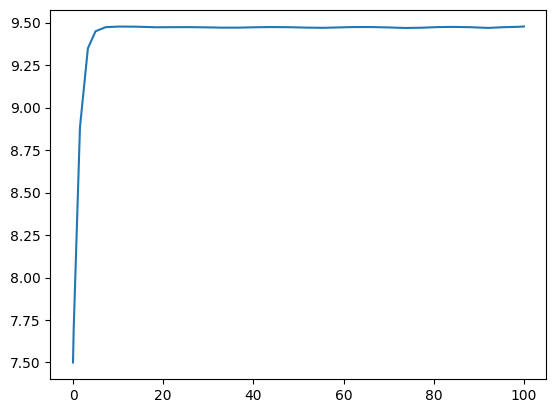

In [55]:
K = 10 #carrying capacity
c = 0.5 
sol = scipy.integrate.solve_ivp(lambda t,x: f(x,K,c,t),(0,100),[7.5])
equil = sol.y[0,-1]
plt.plot(sol.t,sol.y[0])

In [56]:
Tstart = 0
Tend = 100
npoints = 10000

dt = (Tend - Tstart)/npoints
xs = np.zeros(npoints)
xs[0] = equil

W = np.random.normal(scale=np.sqrt(dt),size=xs.size)
t = 0

for i in tqdm.trange(npoints-1):
    xs[i+1] = xs[i] + f(xs[i],K,c,t)*dt + W[i]

100%|██████████| 9999/9999 [00:00<00:00, 496723.31it/s]


(5.0, 14.0)

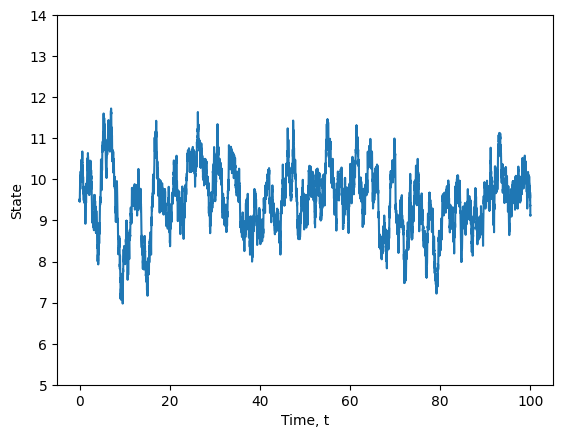

In [58]:
ts = np.linspace(Tstart,Tend,npoints)
plt.plot(ts,xs)
plt.xlabel('Time, t')
plt.ylabel('State')
plt.ylim(5,14)

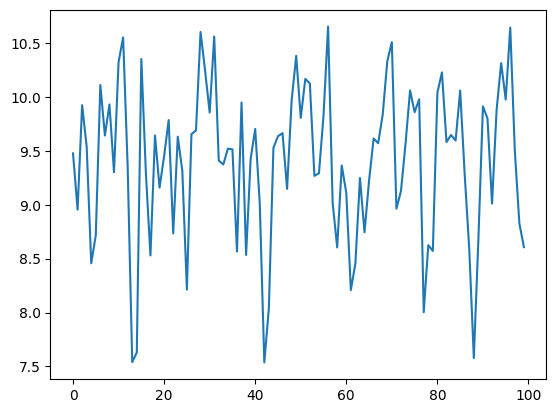

In [6]:
plt.plot(np.arange(100),xs[::100])

(5.0, 14.0)

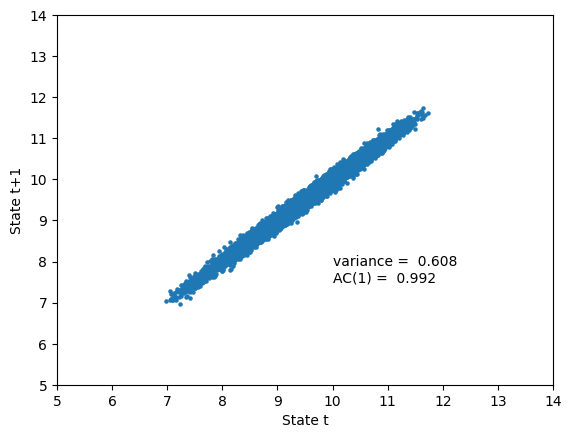

In [59]:
#lag-1 plot
k = 1
var = np.var(xs)

# statsmodels.tsa.tsatools.detrend(xs, order=0)  or  xs-np.mean(xs)
ac_1 = statsmodels.tsa.stattools.acf(xs-np.mean(xs))[1]



plt.scatter(xs[:npoints-k],xs[k:],s=5)
plt.xlabel('State t')
plt.ylabel('State t+1')
plt.text(10,7.5,f'variance = {var: .3f}\nAC(1) = {ac_1: .3f}')
plt.xlim(5,14)
plt.ylim(5,14)

In [8]:
np.var(xs), ac_1

(0.5554276684038388, 0.9909838024273951)

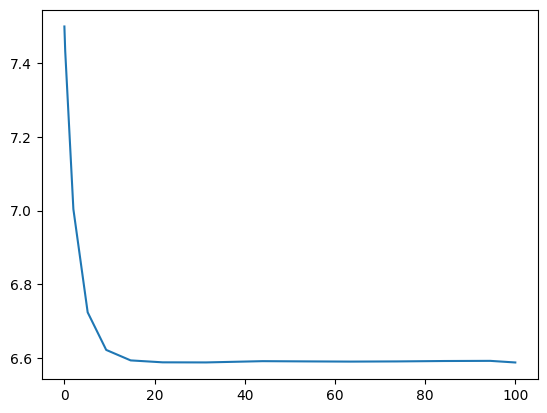

In [46]:
K = 10 #carrying capacity
c = 2.3 #reslience: 0.5 high, 2.3 low
sol = scipy.integrate.solve_ivp(lambda t,x: f(x,K,c,t),(0,100),[7.5])
equil = sol.y[0,-1]
plt.plot(sol.t,sol.y[0])

In [47]:
Tstart = 0
Tend = 100
npoints = 10000

dt = (Tend - Tstart)/npoints
xs = np.zeros(npoints)
xs[0] = equil

W = np.random.normal(scale=np.sqrt(dt),size=xs.size)
t = 0

for i in tqdm.trange(npoints-1):
    xs[i+1] = xs[i] + f(xs[i],K,c,t)*dt + W[i]

100%|██████████| 9999/9999 [00:00<00:00, 476199.00it/s]


(1.0, 10.0)

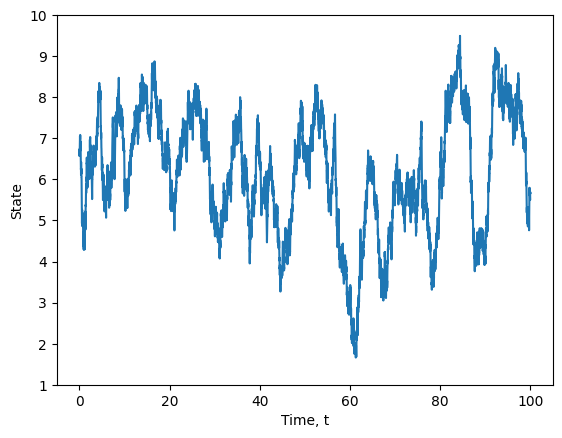

In [52]:
ts = np.linspace(Tstart,Tend,npoints)
plt.plot(ts,xs)
plt.xlabel('Time, t')
plt.ylabel('State')
plt.ylim(1,10)

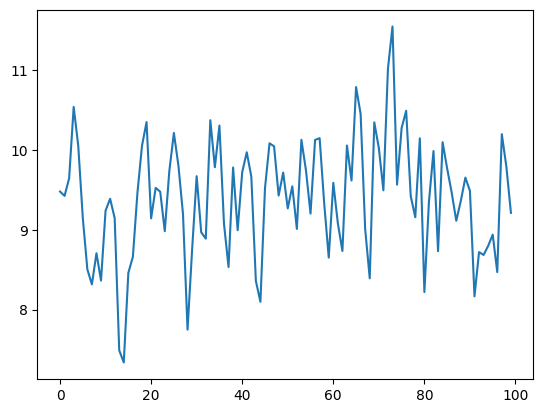

In [123]:
plt.plot(np.arange(100),xs[::100])

(1.0, 10.0)

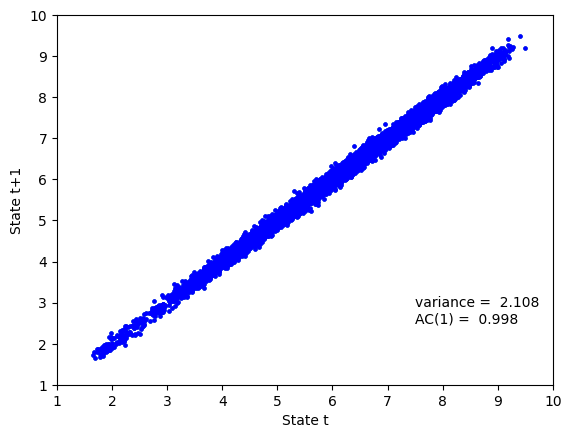

In [54]:
#lag-1 plot
k = 1
plt.scatter(xs[:npoints-k],xs[k:],s=5)
var = np.var(xs)

# statsmodels.tsa.tsatools.detrend(xs, order=0)  or  xs-np.mean(xs)
ac_1 = statsmodels.tsa.stattools.acf(xs-np.mean(xs))[1]



plt.scatter(xs[:npoints-k],xs[k:],s=5,c='blue')
plt.xlabel('State t')
plt.ylabel('State t+1')
plt.text(7.5,2.5,f'variance = {var: .3f}\nAC(1) = {ac_1: .3f}')
plt.xlim(1,10)
plt.ylim(1,10)

In [169]:
np.var(xs), ac_1

(2.0358917727103334, 0.9975335765518996)